In [1]:
cd /home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src

/home/roberto/Documents/Carrera/romain_ic/wavemixing_project/src


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from file_manager.visualization_preparation_tools import *
plt.style.use('tableau-colorblind10')

In [22]:
b0_input = 0.1
N = 7
Omega = 6.0
Delta = 20.0 
DefaultInfo = f"g2_N{N}_Omega{Omega}_Delta{Delta}_"
description = f"b0_{b0_input}_V_Int_On_theta_avg_"
descriptionOff = f"b0_{b0_input}_S_Int_Off_fixed__"
results_path = "../results/"
defaultangle = "25_"
angle="205"
rho_ss_parameter = "_direct"
geometric = True

phis = np.round(np.linspace(0,360,40),3)
#phis = np.insert(phis, 10, 90)


In [4]:
num_runs = 40
experiments = np.zeros([num_runs, len(phis)], dtype = "object")

In [5]:
for i in range(len(phis)):
    label_folder = results_path+DefaultInfo+description+"_"+ defaultangle +angle+ "_"+str(int(phis[i]))   + rho_ss_parameter + "/"
    paths_array = get_array_of_runs_files(label_folder) #all runs for a given phi
    runs_txt = get_array_of_numpy_runs(paths_array) #all runs for a given phi
    for j in range(len(experiments)):
        experiments[j][i] = runs_txt[j]
print(len(runs_txt))

41


In [30]:
#experiments[rodada][angulo][t,G2, I]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


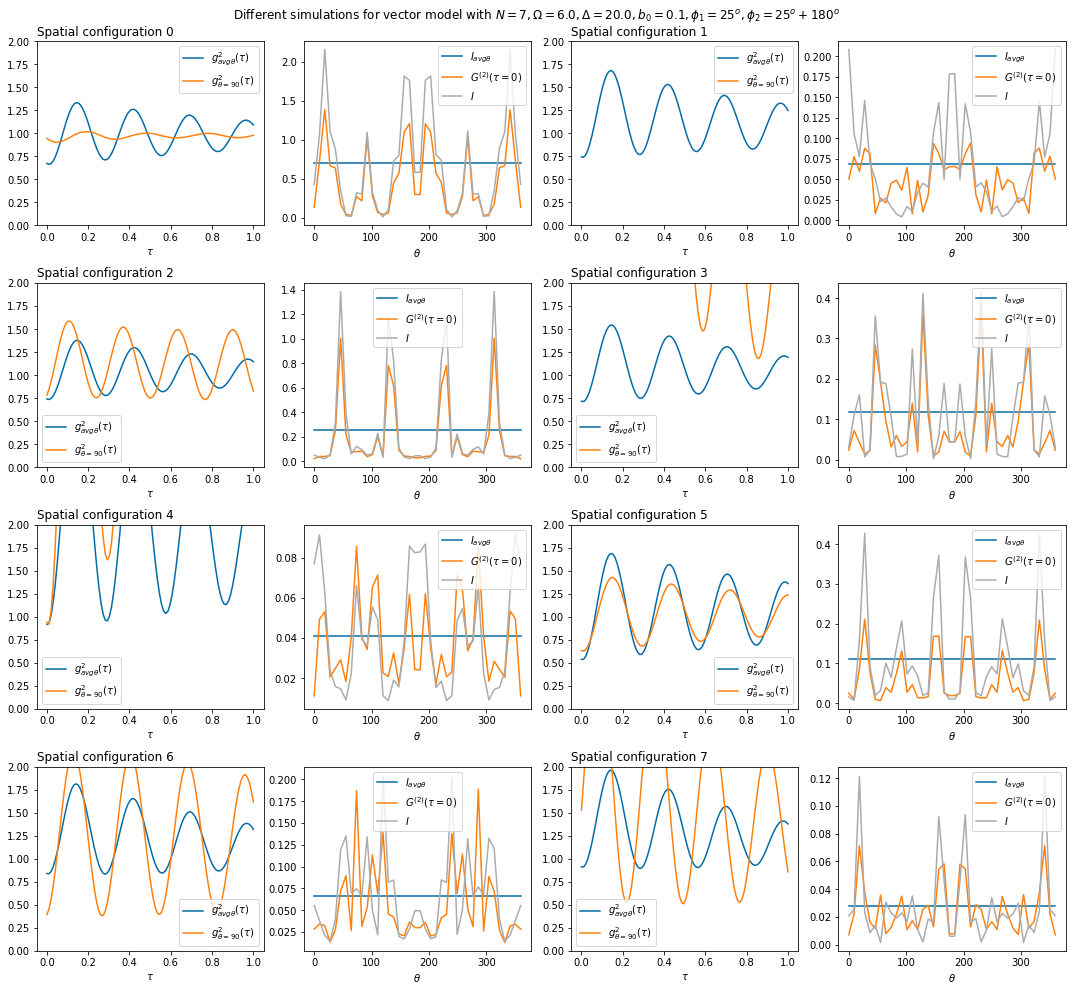

In [6]:

exp_list = [8,9, 10, 1,3,0,2, 4, 5, 6, 7]
exp_list = [5,3, 8, 1, 4,6,0,7]#, 4, 5, 6, 7]

exp_list = [i for i in range(len(runs_txt))]
print(exp_list)
pares = [[1,2], [3,4], [5,6], [7,8], [9,10], [11,12], [13,14], [15,16]]

fig = plt.figure(figsize = (15,14))
plt.suptitle(f"Different simulations for vector model with $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0_input} , \phi_1 = 25^o, \phi_2 = 25^o+180^o $", size = "large")

g2_phi_avg_all_configurations = []
g2_in_plane_all_configurations = []

    

for j in range(len(pares)):
    exp_num = exp_list[j]
    i = exp_num
    
    
    G2_phi_avg = np.average([experiments[exp_num][i][1] for i in range(len(phis))], axis = 0)
    I_phi_avg = np.average(np.array([experiments[exp_num][i][2][0] for i in range(len(phis))]))
    g2_phi_avg  = G2_phi_avg/I_phi_avg
    g2_phi_avg_all_configurations.append(g2_phi_avg)
    
    g2_in_plane_all_configurations.append(np.array(experiments[exp_num][10][1])/experiments[exp_num][10][2][0])
    
    taulist = experiments[exp_num][0][0]
   
    
    plt.subplot(4, 4, pares[j][0])
    plt.ylim(0,2)

    plt.title(f"Spatial configuration {i}", loc = "left") 

    plt.plot(taulist, g2_phi_avg, label = r"$g^{2}_{avg \theta}(\tau)$")
    plt.plot(taulist, np.array(experiments[exp_num][10][1])/experiments[exp_num][10][2][0], label = r"$g^{2}_{\theta = 90}(\tau)$" )
    plt.xlabel(r"$\tau$")
    plt.legend()

    plt.subplot(4, 4, pares[j][1])
    plt.plot(phis,np.ones([len(phis)])*np.average(np.array([experiments[exp_num][i][2][0] for i in range(len(phis))])), label = r"$ I_{avg \theta}$" ) 
    plt.plot(phis,[experiments[exp_num][i][1][0] for i in range(len(phis))], label = r"$ G^{(2)}(\tau = 0) $")
    plt.plot(phis,[experiments[exp_num][i][2][0] for i in range(len(phis))], label = r"$ I $")
    plt.xlabel(r"$\theta$")
    plt.legend()
    


plt.tight_layout()
plt.savefig(f"many_different_simulations_with_theta_averaging_N{N}_Omega{Omega}_Delta{Delta}_b0_{b0_input}.png")

In [35]:
num_runs = 40
g2_phi_avg_all_configurations = []
for i in range(0, num_runs, 1):
    exp_num = i
    G2_phi_avg = np.average([experiments[exp_num][i][1] for i in range(len(phis))], axis = 0)
    I_phi_avg = np.average(np.array([experiments[exp_num][i][2][0] for i in range(len(phis))]))
    g2_phi_avg  = G2_phi_avg/I_phi_avg
    g2_phi_avg_all_configurations.append(g2_phi_avg)
    
    g2_in_plane_all_configurations.append(np.array(experiments[exp_num][10][1])/experiments[exp_num][10][2][0])
    

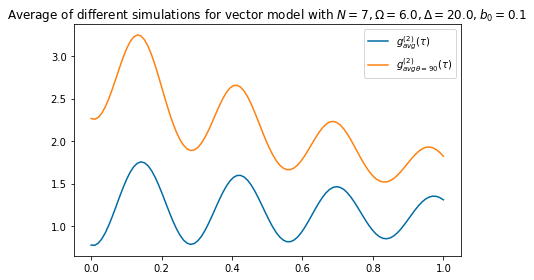

In [36]:
plt.title(f"Average of different simulations for vector model with $ N = {N}, \Omega = {Omega}, \Delta = {Delta}, b_0 = {b0_input} $", size = "large")


plt.plot(taulist, np.average(g2_phi_avg_all_configurations, axis = 0), label = r"$g^{(2)}_{avg}(\tau)$")
plt.plot(taulist, np.average(g2_in_plane_all_configurations, axis = 0), label = r"$g^{(2)}_{avg \theta = 90}(\tau)$")

plt.legend()
plt.tight_layout()
plt.savefig(f"average_of_different_simulations_with_theta_averaging_N{N}_Omega{Omega}_Delta{Delta}_b0_{b0_input}.png")

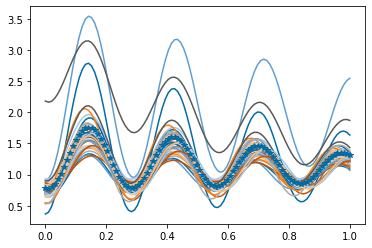

In [37]:
for i in range(len(g2_phi_avg_all_configurations)):
    plt.plot(taulist, g2_phi_avg_all_configurations[i])
plt.plot(taulist, np.average(g2_phi_avg_all_configurations, axis = 0), "*")

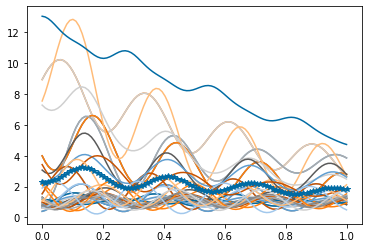

In [38]:
for i in range(len(g2_phi_avg_all_configurations)):
    plt.plot(taulist, g2_in_plane_all_configurations[i])
plt.plot(taulist, np.average(g2_in_plane_all_configurations, axis = 0), "*")